In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train = r"C:\Users\hp\Untitled Folder 2\Dataset\train"
valid = r"C:\Users\hp\Untitled Folder 2\Dataset\train"
test = r"C:\Users\hp\Untitled Folder 2\Dataset\train"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data = ImageDataGenerator(rescale = 1./255)
test_data = ImageDataGenerator(rescale = 1./255)

train_generator = train_data.flow_from_directory(
    train,
    target_size =(150,150),
    batch_size = 20,
    class_mode = "binary"
    )
test_generator = test_data.flow_from_directory(
    valid,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"

)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [36]:
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers import Dropout
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [38]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

In [39]:
history = model.fit_generator(
           train_generator,steps_per_epoch = 100,epochs = 10,validation_data = test_generator,
            validation_steps = 50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/10
100/100 [==============================] - 141s 1s/step - loss: 0.7112 - acc: 0.5300 - val_loss: 0.6649 - val_acc: 0.6730
Epoch 2/10
100/100 [==============================] - 124s 1s/step - loss: 0.6471 - acc: 0.6215 - val_loss: 0.5854 - val_acc: 0.7500
Epoch 3/10
100/100 [==============================] - 126s 1s/step - loss: 0.5884 - acc: 0.7040 - val_loss: 0.5277 - val_acc: 0.7660
Epoch 4/10
100/100 [==============================] - 126s 1s/step - loss: 0.5444 - acc: 0.7335 - val_loss: 0.4856 - val_acc: 0.7830
Epoch 5/10
100/100 [==============================] - 128s 1s/step - loss: 0.5059 - acc: 0.7580 - val_loss: 0.4440 - val_acc: 0.8030
Epoch 6/10
100/100 [==============================] - 136s 1s/step - loss: 0.4702 - acc: 0.7715 - val_loss: 0.5599 - val_acc: 0.6860
Epoch 7/10
100/100 [==============================] - 133s 1s/step - loss: 0.4438 - acc: 0.7995 - val_loss: 0

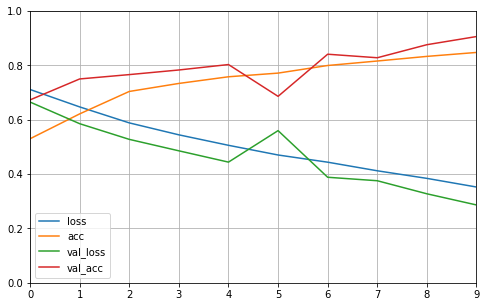

In [40]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [41]:
valid_data = ImageDataGenerator(rescale = 1./255)
valid_generator = valid_data.flow_from_directory(
    valid,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"

)


Found 2000 images belonging to 2 classes.


model.predict(valid_generator)

In [21]:
model.save("model.h5")

In [47]:
_,acc = model.evaluate_generator(valid_generator,steps = len(valid_generator),verbose =0)

  ...
    to  
  ['...']


In [45]:
print('>%.3f'%(acc * 100.0))

TypeError: can't multiply sequence by non-int of type 'float'

In [46]:
summarize_diagnostics(history)

NameError: name 'summarize_diagnostics' is not defined

In [23]:
import cv2
new = "a.jpg"
img = cv2.imread("a.jpg")

numpy.ndarray

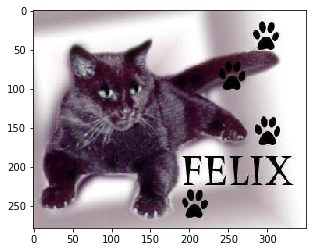

In [24]:
plt.imshow(img)

TypeError: listdir: path should be string, bytes, os.PathLike or None, not ImageDataGenerator